<font color=blue>
리뷰 모임을 가진 후 조원들로부터 받은 피드백을 바탕으로 수정하였다. 기존 과제에서 수정이 이루어진 부분은 파란색으로 표시하였다.  


# 주제 : 담뱃값과 흡연율 간의 상관관계
부제 : 담뱃값 인상이 흡연율 감소에 효과적인가?

(1) 데이터셋 
- 지출목적별 분류 소비자물가지수 (자료 출처 : 통계청)
- 국제통계연감:1인당 담배소비량(OECD) (자료 출처 : 통계청) <br> <br>

<font color=blue>
담배 소비량에 대한 설명을 추가적으로 작성해달라는 피드백을 바탕으로 수정하였다.<br> 데이터셋 추가 설명이라는 부분에 1인당 담배 소비량의 정의와 한국 담배의 중량을 추가하였다. <br> 해당 피드백을 준 학생은 함주원 학생이다.  </font>
    
(2) 데이터셋 추가 설명 
- 1인당 담배소비량은 15세 이상 인구의 담배 소비량을 g(그램)으로 환산한 수치이다. 한국 크트엔지에서 발표한 평균 한국 담배의 중량은 평균 1갑에 24g(그램)이다. <br> (출처 : 통계청_1인당 담배소비량(OECD)_자료분석) <br>
- 소비자 물가지수는 소비자가 일상생활에 쓰기 위하여 구입하는 재화와 서비스(소비재)의 가격변동을 나타내는 물가지수로, 가계의 평균적인 생계비 내지는 구매력의 변동을 측정하는데 유용한 물가지수이다. 따라서 소비자물가지수는 대표적인 인플레이션 지표로 사용된다. <br>
(출처 : 네이버 지식백과_소비자물가지수)

(3) 탐구 질문
- 담뱃값 인상 정책이 시행된 시점을 전 후로 흡연율이 어떠한 차이를 보이는가?
- 담뱃값 변화가 흡연율 감소에 영향을 미치는가? 
- 담뱃값 인상 정책이 그 목적에 부합하는 효과적인 정책인가?

(4) 분석할 변수(요인)
- 흡연율 : 1인당 담배 소비량
- 담뱃값 : 담배 소비자물가지수

(5) 가설
- 담뱃값이 인상되면 흡연율 감소 효과가 나타날 것이다. 그러나 흡연율 감소 효과는 일시적일 것이다. <br>
- 담뱃값 인상 금액이 높으면 낮은 경우에 비해 흡연율 감소에 더욱 효과적일 것이다. <br>

*흡연율은 인당 담배 소비량으로 대체하여 해석한다. <br>
*데이터 분석은 2001년에서 2018년까지를 대상으로 한다. <br>

#  1. 데이터 전처리

In [1]:
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

'%.3f'

In [2]:
df = pd.read_csv('consumer_price_index.csv', encoding='utf-8') # 지출품목별 소비자 물가지수 데이터 불러오기.
data = df.loc[:,['기간','담배']] # 담배 품목 소비자 물가지수만 추출하기. 
data.rename(columns={'담배': '담배 소비자 물가지수'}, inplace=True)
data

,기간,담배 소비자 물가지수
0,2001.01,37.291
1,2001.02,37.291
2,2001.03,37.291
3,2001.04,37.291
4,2001.05,37.291
...,...,...
238,2020.11,100.000
239,2020.12,100.000
240,2021.01,100.000
241,2021.02,100.000


In [3]:
data['년도'] = data['기간'].map(lambda x: str(x)[0:4]) # 년도 열 추가 생성하기. 
data

,기간,담배 소비자 물가지수,년도
0,2001.01,37.291,2001
1,2001.02,37.291,2001
2,2001.03,37.291,2001
3,2001.04,37.291,2001
4,2001.05,37.291,2001
...,...,...,...
238,2020.11,100.000,2020
239,2020.12,100.000,2020
240,2021.01,100.000,2021
241,2021.02,100.000,2021


In [4]:
price_increase_section = [2000, 2001, 2004, 2014, 2021] # 역대 담뱃값 인상 열 추가 생성하기. 
group_names = ['5th', '6th', '7th', '8th']
price_increase_section_cut_data = pd.cut(data['년도'].astype('int'), price_increase_section, labels = group_names )
data['담뱃값 인상'] = price_increase_section_cut_data
data

,기간,담배 소비자 물가지수,년도,담뱃값 인상
0,2001.01,37.291,2001,5th
1,2001.02,37.291,2001,5th
2,2001.03,37.291,2001,5th
3,2001.04,37.291,2001,5th
4,2001.05,37.291,2001,5th
...,...,...,...,...
238,2020.11,100.000,2020,8th
239,2020.12,100.000,2020,8th
240,2021.01,100.000,2021,8th
241,2021.02,100.000,2021,8th


In [5]:
df2= pd.read_excel('cigarette_consumption.xlsx', encoding='utf-8') # 1인당 담배 소비량 데이터 불러오기. 
k_data = df2.iloc[1,1:]
cigarette_consumption_map = k_data

data['인당 담배 소비량'] = data['년도'].map(cigarette_consumption_map) # 인당 담배 소비량 열 추가 생성하기.
df1 = data.dropna() # 결측값 제거하기.
df1

,기간,담배 소비자 물가지수,년도,담뱃값 인상,인당 담배 소비량
0,2001.01,37.291,2001,5th,2638
1,2001.02,37.291,2001,5th,2638
2,2001.03,37.291,2001,5th,2638
3,2001.04,37.291,2001,5th,2638
4,2001.05,37.291,2001,5th,2638
...,...,...,...,...,...
211,2018.08,100.000,2018,8th,1605
212,2018.09,100.000,2018,8th,1605
213,2018.10,100.000,2018,8th,1605
214,2018.11,100.000,2018,8th,1605


In [6]:
cigarette_price ={
    '5th': 1800,
    '6th': 2000,
    '7th': 2500,
    '8th': 4500
}

df1['담배 가격'] = df1['담뱃값 인상'].map(cigarette_price) # 담배 가격 열 추가 생성하기. 
df1

<ipython-input-6-f557e30bf983>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['담배 가격'] = df1['담뱃값 인상'].map(cigarette_price) # 담배 가격 열 추가 생성하기.


,기간,담배 소비자 물가지수,년도,담뱃값 인상,인당 담배 소비량,담배 가격
0,2001.01,37.291,2001,5th,2638,1800
1,2001.02,37.291,2001,5th,2638,1800
2,2001.03,37.291,2001,5th,2638,1800
3,2001.04,37.291,2001,5th,2638,1800
4,2001.05,37.291,2001,5th,2638,1800
...,...,...,...,...,...,...
211,2018.08,100.000,2018,8th,1605,4500
212,2018.09,100.000,2018,8th,1605,4500
213,2018.10,100.000,2018,8th,1605,4500
214,2018.11,100.000,2018,8th,1605,4500


# 2. 담뱃값과 인당 담배 소비량 간의 상관관계 분석하기.<br>
## (1) 그래프 작성하기. <br>
<font color=blue>
그래프에서 빨간색과 파란색이 뜻하는 것이 무엇인지 표시해달라는 피드백을 바탕으로 수정하였다. <br>
legend()를 이용하여 각 그래프가 뜻하는 바가 무엇인지 나타내었다. <br> 
    해당 피드백을 준 학생은 백원재 학생이다. 

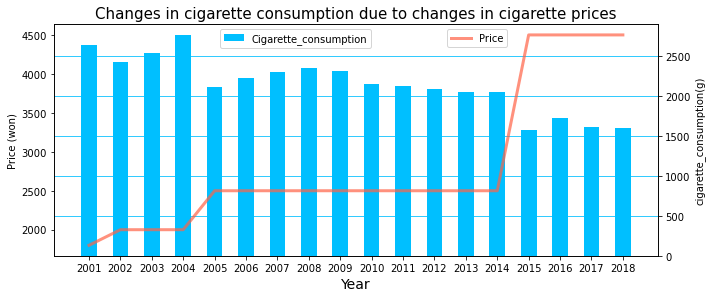

In [7]:
# 담뱃값과 인당 담배 소비량 간의 상관관계를 시각화하기 위한 그래프 작성하기. 

con_data = df1['인당 담배 소비량']
pri_data = df1['담배 가격'].astype('int')
year = df1['년도']

plt.figure(figsize=(10, 4))
ax1, ax2 = plt.gca(), plt.gca().twinx()

ax1.plot(year, pri_data, color='tomato', label='Price', linewidth=3, alpha=0.7)
ax1.set_xlabel('Year', fontsize = '14')
ax1.set_ylabel('Price (won)')

ax2.bar(year, con_data, color='deepskyblue', label='Cigarette_consumption', alpha=1.0, width=0.5)
ax2.set_xlabel('Year')
ax2.set_ylabel('cigarette_consumption(g)')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper center', bbox_to_anchor=(0.7, 1))
ax2.legend(loc='upper center', bbox_to_anchor=(0.4, 1))

plt.grid(True, color = 'deepskyblue')
plt.tight_layout()
plt.title("Changes in cigarette consumption due to changes in cigarette prices", fontsize=15)
plt.show()

## (2) 피어슨 상관계수 활용하기. 

In [8]:
# 피어슨 상관계수를 이용하여 담뱃값과 인당 담배 소비량 간의 상관관계 파악하기. 
[R, p] = stats.pearsonr(df1['담배 가격'].astype('int'), df1['인당 담배 소비량'].astype('int'))
print([R, p])

#매우 강한 음의 상관관계를 나타내며, 상관계수가 유의하다는 것을 알 수 있음. 

[-0.9150168119794673, 2.5439411654138654e-86]


# 3. 담배 소비량 변화량과 담뱃값 변화 간의 상관관계 분석하기.<br>
<font color=blue>
담배 소비량 증감율과 담뱃값 변화율 간의 상관관계 분석 부분에서 비율이 아닌 수치적 변화로만 상관관계를 분석하는 것이 좋을 것 같다는 피드백을 바탕으로 수정하였다. <br>  해당 피드백을 준 학생은 백원재 학생이다.  </font>

## (1) 전년 대비 인당 담배 소비량 변화 파악하기. 

In [9]:
def cigarette_rate():
    for k in range(0,17,1):
        a  = (((k_data[k+1]))-k_data[k])
        b = k_data.index[k+1]
        c = k_data.index[k]
        rate = ("'%s ~ %s' : %d(g),"  %(c,b,a))
        print(rate)
        
cigarette_rate()

'2001 ~ 2002' : -210(g),
'2002 ~ 2003' : 106(g),
'2003 ~ 2004' : 226(g),
'2004 ~ 2005' : -644(g),
'2005 ~ 2006' : 111(g),
'2006 ~ 2007' : 72(g),
'2007 ~ 2008' : 47(g),
'2008 ~ 2009' : -32(g),
'2009 ~ 2010' : -163(g),
'2010 ~ 2011' : -20(g),
'2011 ~ 2012' : -36(g),
'2012 ~ 2013' : -41(g),
'2013 ~ 2014' : 0(g),
'2014 ~ 2015' : -473(g),
'2015 ~ 2016' : 139(g),
'2016 ~ 2017' : -113(g),
'2017 ~ 2018' : -2(g),


In [10]:
cigarette_rate ={
    
    '2002' :  -210,
    '2003' : 106,
    '2004' : 226,
    '2005' : -644,
    '2006' : 111,
    '2007' : 72,
    '2008' : 47,
    '2009' : -32,
    '2010' : -163,
    '2011' : -20,
    '2012' : -36,
    '2013' : -41,
    '2014' : 0,
    '2015' : -473,
    '2016' : 139,
    '2017' : -113,
    '2018' : -2
}

df1['전년 대비 담배 소비량 변화'] = df1['년도'].map(cigarette_rate) # 전년 대비 담배 소비량 증감율 열 추가 생성하기. 
df1

<ipython-input-10-9f2da7dbef11>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['전년 대비 담배 소비량 변화'] = df1['년도'].map(cigarette_rate) # 전년 대비 담배 소비량 증감율 열 추가 생성하기.


,기간,담배 소비자 물가지수,년도,담뱃값 인상,인당 담배 소비량,담배 가격,전년 대비 담배 소비량 변화
0,2001.01,37.291,2001,5th,2638,1800,NaN
1,2001.02,37.291,2001,5th,2638,1800,NaN
2,2001.03,37.291,2001,5th,2638,1800,NaN
3,2001.04,37.291,2001,5th,2638,1800,NaN
4,2001.05,37.291,2001,5th,2638,1800,NaN
...,...,...,...,...,...,...,...
211,2018.08,100.000,2018,8th,1605,4500,-2.0
212,2018.09,100.000,2018,8th,1605,4500,-2.0
213,2018.10,100.000,2018,8th,1605,4500,-2.0
214,2018.11,100.000,2018,8th,1605,4500,-2.0


## (2) 전년 대비 담뱃값 변화 파악하기. 

In [11]:
cigarette_price = [1800, 2000, 2500, 4500]
a = len(cigarette_price)

for k in range(a-1):
    print((cigarette_price[k+1])-cigarette_price[k])
    
price_rate ={
    '6th': 200,
    '7th': 500,
    '8th': 2000
}

df1['전년 대비 담뱃값 변화'] = df1['담뱃값 인상'].map(price_rate) # 전년 대비 담뱃값 변화율 열 추가 생성하기. 
df1

200
500
2000


<ipython-input-11-b8782d909e9b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['전년 대비 담뱃값 변화'] = df1['담뱃값 인상'].map(price_rate) # 전년 대비 담뱃값 변화율 열 추가 생성하기.


,기간,담배 소비자 물가지수,년도,담뱃값 인상,인당 담배 소비량,담배 가격,전년 대비 담배 소비량 변화,전년 대비 담뱃값 변화
0,2001.01,37.291,2001,5th,2638,1800,NaN,NaN
1,2001.02,37.291,2001,5th,2638,1800,NaN,NaN
2,2001.03,37.291,2001,5th,2638,1800,NaN,NaN
3,2001.04,37.291,2001,5th,2638,1800,NaN,NaN
4,2001.05,37.291,2001,5th,2638,1800,NaN,NaN
...,...,...,...,...,...,...,...,...
211,2018.08,100.000,2018,8th,1605,4500,-2.0,2000.0
212,2018.09,100.000,2018,8th,1605,4500,-2.0,2000.0
213,2018.10,100.000,2018,8th,1605,4500,-2.0,2000.0
214,2018.11,100.000,2018,8th,1605,4500,-2.0,2000.0


## (3) 전년 대비 담배 소비량 변화 추이 그래프 작성하기. 

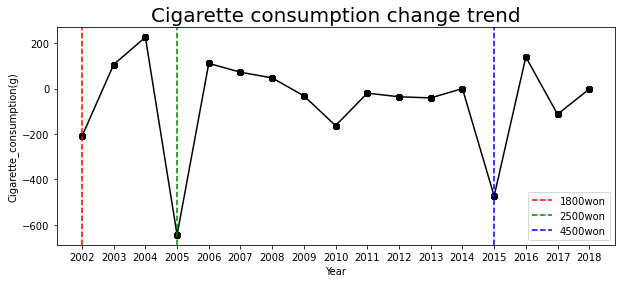

In [12]:
# 전년 대비 담배 소비량 변화 추이 작성하기. 
plt.figure(figsize=(10, 4))
plt.plot(year, df1['전년 대비 담배 소비량 변화'] ,color = 'k', linestyle = '-', marker = 'o')
plt.xlabel('Year')
plt.ylabel('Cigarette_consumption(g)')
plt.title('Cigarette consumption change trend', fontsize = '20')
plt.axvline(x= '2002' , color='red', linestyle = '--', label = '1800won')
plt.axvline(x= '2005' , color='green', linestyle = '--', label = '2500won')
plt.axvline(x= '2015' , color='blue', linestyle = '--', label = '4500won')
plt.legend()

## (4) 피어슨 상관계수 활용하기. 

In [13]:
# 피어슨 상관계수를 활용하여 전년 대비 담배 소비량 변화와 전년 대비 담뱃값 변화 간의 상관관계 분석하기. 
cig_rate = df1['전년 대비 담배 소비량 변화'][12:]
pri_gap = df1['전년 대비 담뱃값 변화'][12:]
[R, p] = stats.pearsonr(pri_gap, cig_rate )
print([R, p])
#약한 음의 상관관계를 나타내며, 상관계수가 유의하다는 것을 알 수 있음.

[-0.16447826462279502, 0.01873223653560873]


# 4. 가설 검증 및 결론

(1) 담뱃값이 인상된 시점은 전년에 비해 담배 소비량이 확연히 감소하였다. 또한, 담뱃값과 담배 소비량 간의 피어슨 상관계수가 매우 강한 음의 상관관계를 나타내었다. 이를 통해 담뱃값 인상 정책이 담배 소비량 감소 효과를 가져올 수 있음을 알 수 있다. <br>
담뱃값이 인상된 이후에 담배 소비량이 다시 증가하는 등 꾸준한 감소 형태를 나타내지는 않았지만 그 증가량이 담뱃값이 인상되기 전의 소비량에는 현저히 못 미친다는 점에서 담배값 인상 정책이 담배 소비량을 낮추는 데에 있어 어느 정도 효과적이며 그 효과가 지속적이라는 것을 알 수 있다. 이를 통해 "흡연율 감소 효과는 일시적일 것이다."라는 가설은 옳지 않음을 확인할 수 있다. <br>
<br>
(2) 담뱃값이 200원 인상되었을 경우와 2000원 인상되었을 경우의 전년 대비 담배 소비량이 큰 차이를 나타내지 않았다. 오히려 200원 인상 되었을 경우의 담배 소비량 변화가 -644(g)으로 가장 큰 폭으로 감소하였다. 또한, 담뱃값 변화와 담배 소비량 변화 간의 피어슨 상관계수가 약한 음의 상관관계를 나타내었다. 이를 통해 담뱃값 인상 금액과 담배 소비량이 무관함을 알 수 있으며 "담뱃값 인상 금액이 높으면 낮은 경우에 비해 흡연율 감소에 더욱 효과적일 것이다."라는 가설은 옳지 않음을 확인할 수 있다. <br>
<br>
(3) 1인당 담배소비량 데이터는 연초형 일반 담배에 대한 데이터만 포함하고 있기 때문에 해당 데이터만으로는 실제 흡연율에 대해서 논하기 어렵다. 일반 담배의 흡연율은 감소하였지만 일반 담배 대신 다른 담배로 흡연을 하였을 경우에 대해서는 전혀 고려되지 않았기에 해당 데이터만으로 "담뱃값 인상 정책이 흡연율 감소에 효과적이다."라고 성급한 일반화를 하기에는 무리가 있다. 실제로도 질병관리본부가 21일 발표한‘2019년 지역사회건강조사’에 따르면 지난해 남자 현재흡연율은 37.4%로 1년 전(40.6%)보다 눈에 띄게 떨어졌으나 같은 기간 남성의 궐련형 전자담배흡연율은 4.5%에서 6.7%로 비중을 따졌을 때 50% 가까이 훌쩍 뛰어올랐다. 일반 담배 이외에 다른 담배의 소비량도 함께 분석하였다면 더 정확한 결론을 낼 수 있을 것으로 예상한다. <br> 
<br>
<font color=blue>
전자 담배의 소비량도 추가적으로 제시하여 분석을 진행하면 좋을 것 같다는 피드백을 받아 해당 부분을 추가하여 분석을 진행하고자 하였으나 적절한 전자담배 관련 데이터를 찾지 못하였다. 통계청에서 "건강검진통계:시도별 성별 전자흡연 관련 문항" 이라는 데이터를 찾았으나 분석 시점이 2018~2019년 밖에 존재하지 않았다. 해당 탐구 프로젝트는 2018년까지의 데이터만을 대상으로 진행하였기에 통계청의 데이터를 대입하기에는 어려움이 있다고 판단하여 전자담배 관련 데이터를 추가하여 분석을 진행하지 못했다. 따라서 결론 부분에 탐구 프로젝트가 가지고 있는 한계점을 제시하는 것으로 대체하였다. <br>
해당 피드백을 준 학생은 황연정 학생이다. </font> <br> <br>
(4) 담뱃값 인상 이외의 흡연율을 감소할 수 있는 방안으로 금연 구역에서의 흡연 감지 센서 설치 방안이 적절하다고 생각한다. 현재 공공장소와 길거리, 버스 정류장 인근이 금연 장소로 지정되어 있지만 해당 구역에서 금연이 제대로 이루어지지 않고 있다. 이는 금연 구역이라고 지정만 되어있지 흡연하는 것을 탐지하는 장치가 없어 금연 구역에서 흡연을 하여도 적발되는 경우가 드물기 때문이라고 생각한다. 따라서 금연 구역에 흡연을 탐지할 수 있는 센서를 설치하고 해당 센서가 흡연을 감지하면 카메라가 작동하여 흡연자의 사진을 찍고, 해당 흡연자를 처벌하도록 하면 금연 구역에서의 흡연을 방지할 수 있을 것이라고 생각한다.   
<br>
<font color=blue>
개인적으로 생각하는 흡연율 감소 방안을 제시하면 좋을 것 같다는 피드백을 바탕으로 이와 관련된 내용을 추가하였다.<br>
해당 피드백을 준 학생은 함주원 학생이다. 